In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Import data
interest_rate = pd.read_csv('Resources/MORTGAGE30US.csv', parse_dates=['DATE'], index_col='DATE')
rent_data = pd.read_csv('Resources/Metro_zori_uc_sfrcondomfr_sm_month.csv',)
total_trans_value = pd.read_csv('Resources/Metro_total_transaction_value_uc_sfr_month.csv',)
sales_count = pd.read_csv('Resources/Metro_sales_count_now_uc_sfrcondo_month.csv',)
median_sale = pd.read_csv('Resources/Metro_median_sale_price_uc_sfr_month.csv',)
market_temp_index = pd.read_csv('Resources/Metro_market_temp_index_uc_sfrcondo_month.csv',)


In [3]:
us_rent_data = rent_data[rent_data['RegionName'] == 'United States']
us_total_trans_value = total_trans_value[total_trans_value['RegionName'] == 'United States'].loc[:, '2015-01-31':'2024-07-31']
us_sales_count = sales_count[sales_count['RegionName'] == 'United States'].loc[:, '2015-01-31':'2024-07-31']
us_median_sale = median_sale[median_sale['RegionName'] == 'United States'].loc[:, '2015-01-31':'2024-07-31']
us_market_temp_index = market_temp_index[market_temp_index['RegionName'] == 'United States']

In [4]:
#us_rent_data.head()

In [69]:
#Interest Rate Clean-Up
interest_rate.index = pd.to_datetime(interest_rate.index, format='%Y-%m-%d', errors='coerce')
filtered_interest_rate = interest_rate.loc['2015-01-01':'2024-12-31'].resample("ME").mean()
#filtered_interest_rate = interest_rate.resample("M").mean()
#TEST
filtered_interest_rate.reset_index(inplace=True)
filtered_interest_rate.columns = ['Date', 'Interest Rate']  # Rename columns
filtered_interest_rate

,Date,Interest Rate
0,2015-01-31,3.6700
1,2015-02-28,3.7100
2,2015-03-31,3.7700
3,2015-04-30,3.6720
4,2015-05-31,3.8400
...,...,...
112,2024-05-31,7.0600
113,2024-06-30,6.9175
114,2024-07-31,6.8475
115,2024-08-31,6.5000


In [11]:
us_rent_data_transposed = us_rent_data.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName', 'RegionName'], axis=1, errors='ignore').T
us_total_trans_value_transposed = us_total_trans_value.drop(['RegionID',], axis=1, errors='ignore').T
us_sales_count_transposed = us_sales_count.drop(['RegionID'], axis=1, errors='ignore').T
us_median_sale_transposed = us_median_sale.drop(['RegionID'], axis=1, errors='ignore').T
us_market_temp_index_transposed = us_market_temp_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName', 'RegionName'], axis=1, errors='ignore').T

In [13]:
us_rent_data_transposed.reset_index(inplace=True)  # Convert index to column (Date column)
us_rent_data_transposed.columns = ['Date', 'Rent Data']  # Rename columns
us_rent_data_transposed.head()

,Date,Rent Data
0,2015-01-31,1251.086247
1,2015-02-28,1257.873109
2,2015-03-31,1267.201476
3,2015-04-30,1276.622525
4,2015-05-31,1286.231877


In [15]:
us_total_trans_value_transposed.reset_index(inplace=True)  # Convert index to column (Date column)
us_total_trans_value_transposed.columns = ['Date', 'Transaction Value']  # Rename columns
us_total_trans_value_transposed.head()

,Date,Transaction Value
0,2015-01-31,5.406546e+10
1,2015-02-28,5.589088e+10
2,2015-03-31,7.861839e+10
3,2015-04-30,8.812876e+10
4,2015-05-31,9.817811e+10


In [17]:
us_sales_count_transposed.reset_index(inplace=True)  # Convert index to column (Date column)
us_sales_count_transposed.columns = ['Date', 'Sales']  # Rename columns
us_sales_count_transposed.head()

,Date,Sales
0,2015-01-31,246695.0
1,2015-02-28,256674.0
2,2015-03-31,347409.0
3,2015-04-30,376879.0
4,2015-05-31,409027.0


In [19]:
us_median_sale_transposed.reset_index(inplace=True)  # Convert index to column (Date column)
us_median_sale_transposed.columns = ['Date', 'Median Sale Price']  # Rename columns
us_median_sale_transposed.head()

,Date,Median Sale Price
0,2015-01-31,173000.0
1,2015-02-28,175000.0
2,2015-03-31,184400.0
3,2015-04-30,189900.0
4,2015-05-31,198000.0


In [21]:
us_market_temp_index_transposed.reset_index(inplace=True)  # Convert index to column (Date column)
us_market_temp_index_transposed.columns = ['Date', 'heatmap']  # Rename columns
us_market_temp_index_transposed.head()

,Date,heatmap
0,2018-01-31,49.0
1,2018-02-28,50.0
2,2018-03-31,52.0
3,2018-04-30,54.0
4,2018-05-31,55.0


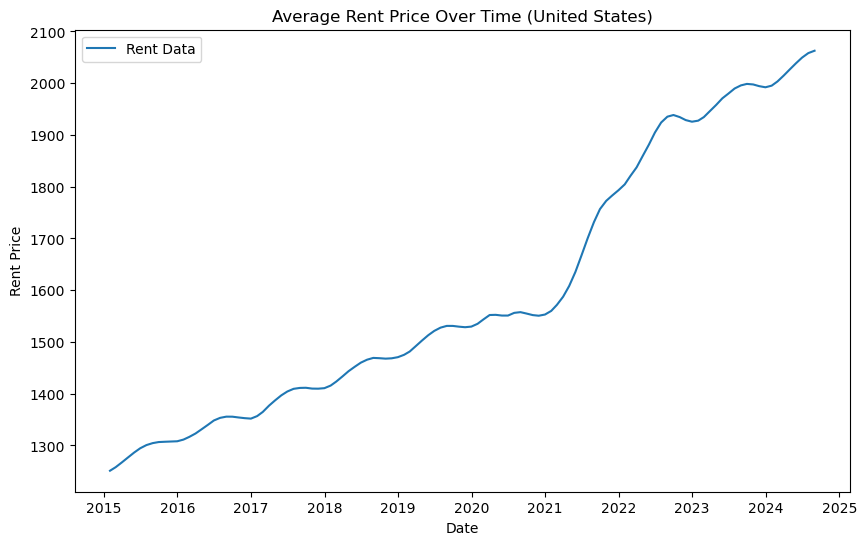

In [23]:
us_rent_data_transposed['Date'] = pd.to_datetime(us_rent_data_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_rent_data_transposed['Date'], us_rent_data_transposed['Rent Data'], label='Rent Data')
plt.xlabel('Date')
plt.ylabel('Rent Price')
plt.title('Average Rent Price Over Time (United States)')
plt.legend()
plt.show()

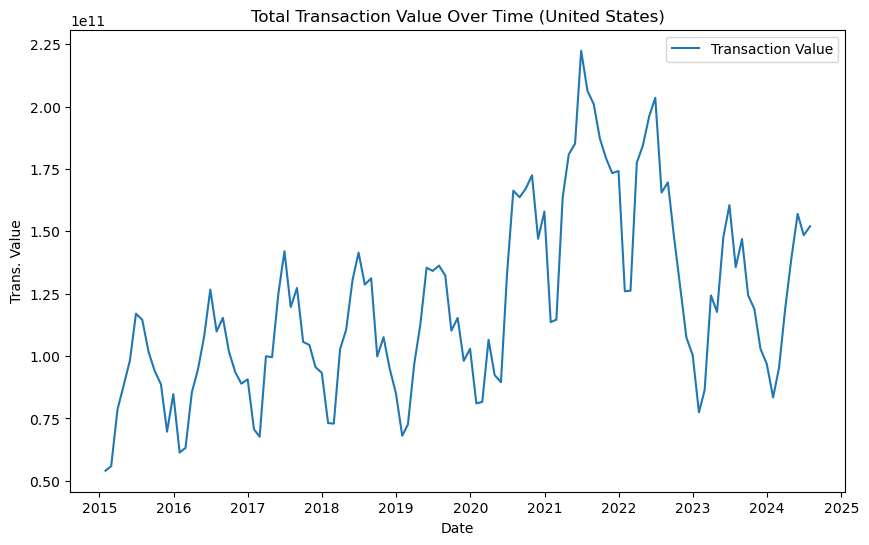

In [25]:
us_total_trans_value_transposed['Date'] = pd.to_datetime(us_total_trans_value_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_total_trans_value_transposed['Date'], us_total_trans_value_transposed['Transaction Value'], label='Transaction Value')
plt.xlabel('Date')
plt.ylabel('Trans. Value')
plt.title('Total Transaction Value Over Time (United States)')
plt.legend()
plt.show()

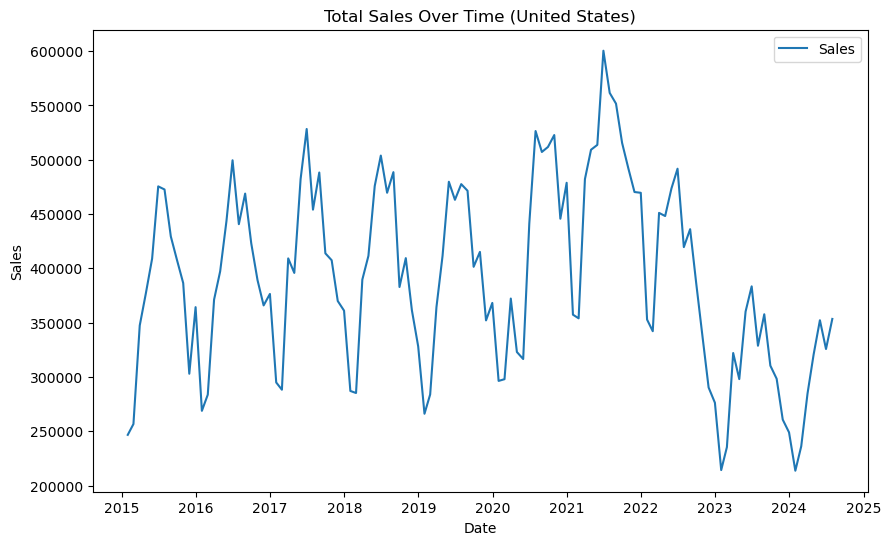

In [27]:
us_sales_count_transposed['Date'] = pd.to_datetime(us_sales_count_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_sales_count_transposed['Date'], us_sales_count_transposed['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total Sales Over Time (United States)')
plt.legend()
plt.show()

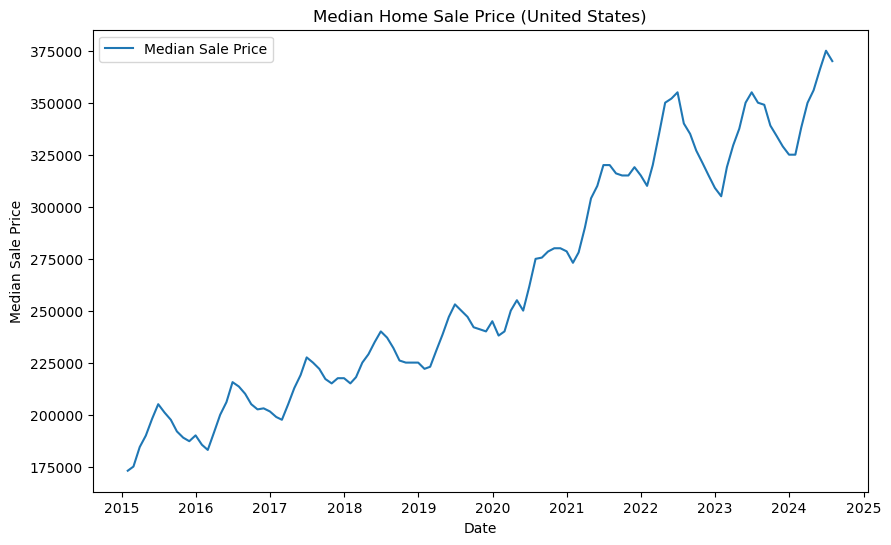

In [29]:
us_median_sale_transposed['Date'] = pd.to_datetime(us_median_sale_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_median_sale_transposed['Date'], us_median_sale_transposed['Median Sale Price'], label='Median Sale Price')
plt.xlabel('Date')
plt.ylabel('Median Sale Price')
plt.title('Median Home Sale Price (United States)')
plt.legend()
plt.show()

In [31]:
############## Merging! #####################

In [ ]:
#Merge Sales Count & Median Sale
#Double Axis Plot

In [33]:
merged_data_count_median = pd.merge(us_sales_count_transposed, us_median_sale_transposed, on='Date', how='inner')
merged_data_count_median.columns = ['Date', 'Sales Count', 'Median Sale Price']
merged_data_count_median

,Date,Sales Count,Median Sale Price
0,2015-01-31,246695.0,173000.0
1,2015-02-28,256674.0,175000.0
2,2015-03-31,347409.0,184400.0
3,2015-04-30,376879.0,189900.0
4,2015-05-31,409027.0,198000.0
...,...,...,...
110,2024-03-31,284719.0,349922.0
111,2024-04-30,320638.0,356000.0
112,2024-05-31,352250.0,366000.0
113,2024-06-30,325733.0,375000.0


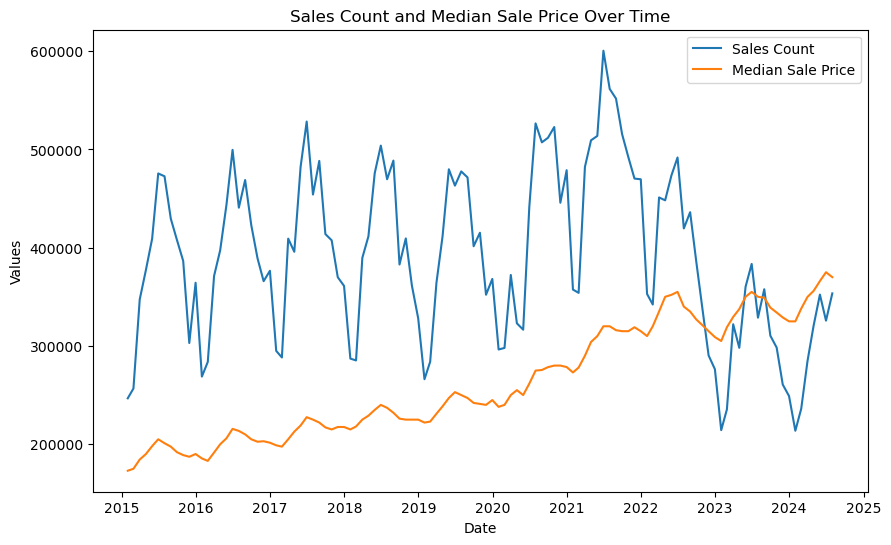

In [37]:
merged_data_count_median['Date'] = pd.to_datetime(merged_data_count_median['Date'], errors='coerce')
merged_data_count_median.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(merged_data_count_median.index, merged_data_count_median['Sales Count'], label='Sales Count')
plt.plot(merged_data_count_median.index, merged_data_count_median['Median Sale Price'], label='Median Sale Price')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Sales Count and Median Sale Price Over Time')
plt.legend()

plt.show()

In [ ]:
#Merge Trans Value & Sales Count
#Double Axis Plot

In [41]:
merged_data_count_tranval = pd.merge(us_total_trans_value_transposed, us_sales_count_transposed, on='Date', how='inner')
merged_data_count_tranval.columns = ['Date', 'Sales Count', 'Transaction Value']
merged_data_count_tranval

,Date,Sales Count,Transaction Value
0,2015-01-31,5.406546e+10,246695.0
1,2015-02-28,5.589088e+10,256674.0
2,2015-03-31,7.861839e+10,347409.0
3,2015-04-30,8.812876e+10,376879.0
4,2015-05-31,9.817811e+10,409027.0
...,...,...,...
110,2024-03-31,1.192720e+11,284719.0
111,2024-04-30,1.391583e+11,320638.0
112,2024-05-31,1.569931e+11,352250.0
113,2024-06-30,1.484445e+11,325733.0


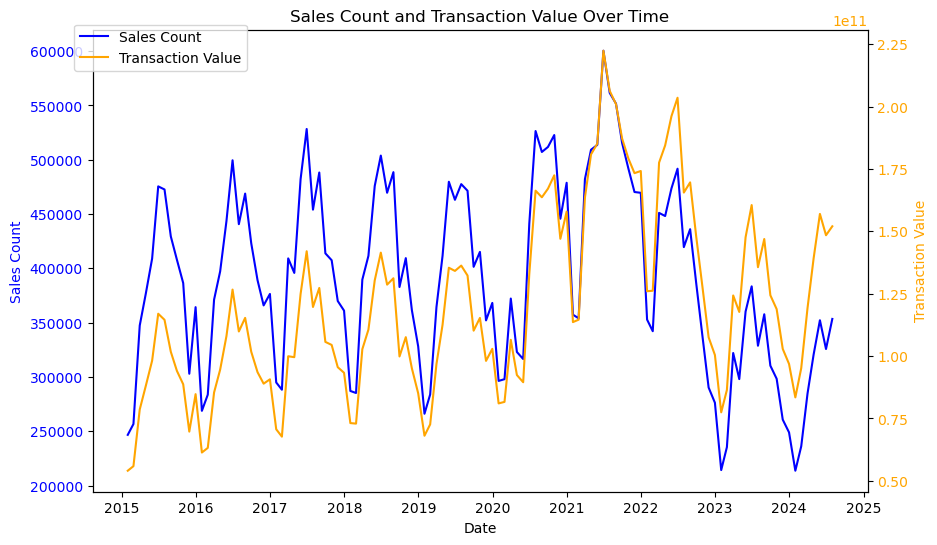

In [53]:
#Double axis plot because data values were vastly different

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.plot(merged_data_count_tranval.index, merged_data_count_tranval['Sales Count'], color='blue', label='Sales Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_data_count_tranval.index, merged_data_count_tranval['Total Transaction Value'], color='orange', label='Transaction Value')
ax2.set_ylabel('Transaction Value', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.title('Sales Count and Transaction Value Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()

In [ ]:
#Merge Interest Rate & Median Sale Price
#Double Axis Plot

In [73]:
merged_data_median_rate = pd.merge(filtered_interest_rate, us_median_sale_transposed, on='Date', how='inner')
merged_data_median_rate.head()

,Date,Interest Rate,Median Sale Price
0,2015-01-31,3.670,173000.0
1,2015-02-28,3.710,175000.0
2,2015-03-31,3.770,184400.0
3,2015-04-30,3.672,189900.0
4,2015-05-31,3.840,198000.0


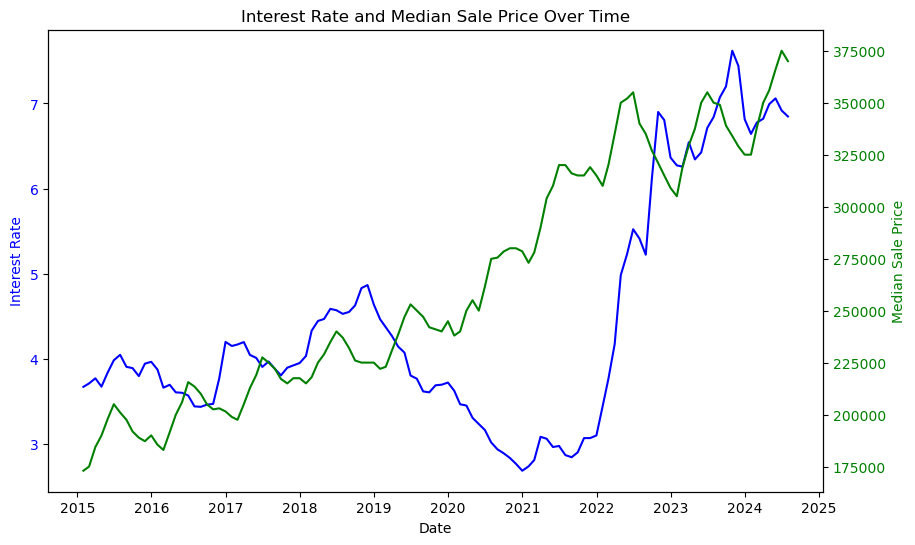

In [77]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data_median_rate['Date'], merged_data_median_rate['Interest Rate'], color='blue', label='Interest Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_data_median_rate['Date'], merged_data_median_rate['Median Sale Price'], color='green', label='Median Sale Price')
ax2.set_ylabel('Median Sale Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Interest Rate and Median Sale Price Over Time')
plt.show()

In [ ]:
#Merge Interest Rate & US Sales Count
#Double Axis Plot

In [79]:
merged_data_sales_rate = pd.merge(filtered_interest_rate, us_sales_count_transposed, on='Date', how='inner')
merged_data_sales_rate.head()

,Date,Interest Rate,Sales
0,2015-01-31,3.670,246695.0
1,2015-02-28,3.710,256674.0
2,2015-03-31,3.770,347409.0
3,2015-04-30,3.672,376879.0
4,2015-05-31,3.840,409027.0


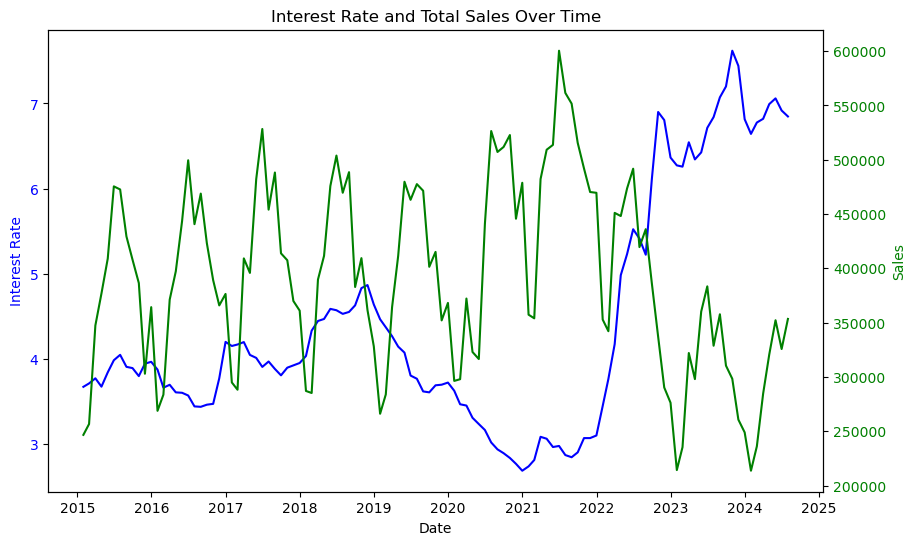

In [91]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data_sales_rate['Date'], merged_data_sales_rate['Interest Rate'], color='blue', label='Interest Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_data_sales_rate['Date'], merged_data_sales_rate['Sales'], color='green', label='Sales')
ax2.set_ylabel('Sales', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Interest Rate and Total Sales Over Time')
plt.show()